In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#import numpy as np

from TSForecasting.TsForecasting import TimeSeriesForecast
from dateutil.parser import parse
import re

Using TensorFlow backend.


In [2]:

def testingData():
    """
    Reading Test Data 
    input:
        none
    output:
        data: testing dataframe with index => DisplayTime value => GlucoseValues
    """
    #reading datasets for training
    data = pd.read_csv("~/Desktop/NCSA_genomics/Data/CGManalyzer.csv")
    data['glucoseValue']=data['glucoseValue']*18
    
    length = data.shape[0]
    length

    for i in range(0,length):
        s = str(data.iloc[i]['timeStamp'])
        k = re.sub("[^0-9]", "", s)
        datetimeObj = parse(k) 
        data = data.replace(to_replace = s, value = datetimeObj)

    #data['timeStamp'] = data['timeStamp'].apply(lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
    
    diabetic_1 = data[data['ID'] == "ID01"]
    diabetic_2 = data[data['ID'] == "ID11"]
    prediabetic = data[data['ID'] == "ID21"]
    nondiabetic = data[data['ID'] == "ID29"]
    
#     diabetic_1 = pd.read_csv("/Users/snehgajiwala/Desktop/NCSA_genomics/Data/CGManalyzer-datasets/test/ID01.csv")
#     diabetic_2 = pd.read_csv("/Users/snehgajiwala/Desktop/NCSA_genomics/Data/CGManalyzer-datasets/test/ID11.csv")
#     prediabetic = pd.read_csv("/Users/snehgajiwala/Desktop/NCSA_genomics/Data/CGManalyzer-datasets/test/ID21.csv")
#     nondiabetic = pd.read_csv("/Users/snehgajiwala/Desktop/NCSA_genomics/Data/CGManalyzer-datasets/test/ID29.csv")
    
    #Converting the Display Time to 'timeStamp' so that it can be used as an index
    #diabetic_1['timeStamp'] = diabetic_1['timeStamp'].apply(lambda x: pd.datetime.strptime(x, '%Y:%m:%d:%H:%M'))
    diabetic_1.drop(['ID'], axis=1, inplace=True)
    diabetic_1 = diabetic_1.set_index(['timeStamp'], drop=True)
    
    #prediabetic['timeStamp'] = prediabetic['timeStamp'].apply(lambda x: pd.datetime.strptime(x, '%Y:%m:%d:%H:%M'))
    prediabetic.drop(['ID'], axis=1, inplace=True)
    prediabetic = prediabetic.set_index(['timeStamp'], drop=True)
    
    #nondiabetic['timeStamp'] = nondiabetic['timeStamp'].apply(lambda x: pd.datetime.strptime(x, '%Y:%m:%d:%H:%M'))
    nondiabetic.drop(['ID'], axis=1, inplace=True)
    nondiabetic = nondiabetic.set_index(['timeStamp'], drop=True)
    
    #diabetic_2['timeStamp'] = diabetic_2['timeStamp'].apply(lambda x: pd.datetime.strptime(x, '%Y:%m:%d:%H:%M'))
    diabetic_2.drop(['ID'], axis=1, inplace=True)
    diabetic_2 = diabetic_2.set_index(['timeStamp'], drop=True)
    
    return diabetic_1, diabetic_2, prediabetic, nondiabetic

def writeToFile(diabetic_1_faulty,diabetic_2_faulty,prediabetic_faulty,non_diabetic_faulty):
    cgmdata = pd.read_csv("~/Desktop/NCSA_genomics/Data/CGManalyzer.csv") #use your path
    cgmdata['timeStamp'] = cgmdata['timeStamp'].apply(lambda x: pd.datetime.strptime(x, '%Y:%m:%d:%H:%M'))
    cgmdata = cgmdata[cgmdata['ID'] != "ID01"]
    cgmdata = cgmdata[cgmdata['ID'] != "ID11"]
    cgmdata = cgmdata[cgmdata['ID'] != "ID21"]
    cgmdata = cgmdata[cgmdata['ID'] != "ID29"]
    
    diabetic_1_faulty['ID'] = "ID01"
    diabetic_2_faulty['ID'] = "ID11"
    prediabetic_faulty['ID'] = "ID21"
    non_diabetic_faulty['ID'] = "ID29"
    
    diabetic_1_faulty = diabetic_1_faulty.reset_index()
    diabetic_2_faulty = diabetic_2_faulty.reset_index()
    prediabetic_faulty = prediabetic_faulty.reset_index()
    non_diabetic_faulty = non_diabetic_faulty.reset_index()
    
    diabetic_1_faulty['glucoseValue']/=18
    diabetic_2_faulty['glucoseValue']/=18
    prediabetic_faulty['glucoseValue']/=18
    non_diabetic_faulty['glucoseValue']/=18
    
    
    
    #cgmdata['time_gap'] = cgmdata['timeStamp']- cgmdata['timeStamp'].shift(1)
#     for Id in cgmdata.groupby('ID'):
#         if Id == 'ID01':
#             cgmdata['glucoseValue'] = diabetic_1_faulty['glucoseValue']
#         if Id == 'ID11':
#             cgmdata['glucoseValue'] = diabetic_2_faulty['glucoseValue']
#         if Id == 'ID21':
#             cgmdata['glucoseValue'] = prediabetic_faulty['glucoseValue']
#         if Id == 'ID29':
#             cgmdata['glucoseValue'] = non_diabetic_faulty['glucoseValue']
    
    #cgmdata[[cgmdata['ID'=="ID01"]['glucoseValue']]] = diabetic_1_faulty[['glucoseValue']]
    #cgmdata.loc[cgmdata['ID'].isin(['ID01'])]['glucoseValue'] = diabetic_1_faulty['glucoseValue']
    
    result = pd.concat([cgmdata,diabetic_1_faulty,diabetic_2_faulty,prediabetic_faulty,non_diabetic_faulty])
    result.to_csv("~/Desktop/NCSA_genomics/Data/outputs/CGManalyzer_imputed.csv")
    


In [3]:

#test_set = testingData()


#obj = TimeSeriesForecast()
#obj.connectivityTester()

In [4]:
obj = TimeSeriesForecast()

Train shape:  (96311, 1, 1)
Epoch 1/1
96311/96311 [==============================] - 189s 2ms/step - loss: 4.4814e-04


,Subject ID,Status,Length of readings,Max. Glucose Value,Mean Glucose Value,Missing Values,Percent of missing values,Days
0,2133-041,non-diabetic,1858,204,108.560,54,2.91,8 days 02:09:26
1,2133-040,non-diabetic,1792,171,92.585,91,5.08,6 days 10:44:37
2,2133-039,diabetic,2013,204,103.922,244,12.12,9 days 01:34:20
3,2133-037,non-diabetic,1785,153,92.966,77,4.31,6 days 07:39:25
4,2133-036,pre-diabetic,1954,214,107.529,243,12.44,8 days 15:04:26
5,2133-035,pre-diabetic,1830,190,101.771,189,10.33,7 days 05:49:42
6,2133-033,non-diabetic,1892,161,92.981,85,4.49,7 days 07:04:31
7,2133-032,non-diabetic,1781,147,99.475,69,3.87,6 days 04:34:25
8,2133-030,non-diabetic,1818,147,93.200,46,2.53,6 days 18:44:36
9,2133-028,non-diabetic,1850,111,74.790,58,3.14,7 days 02:04:30


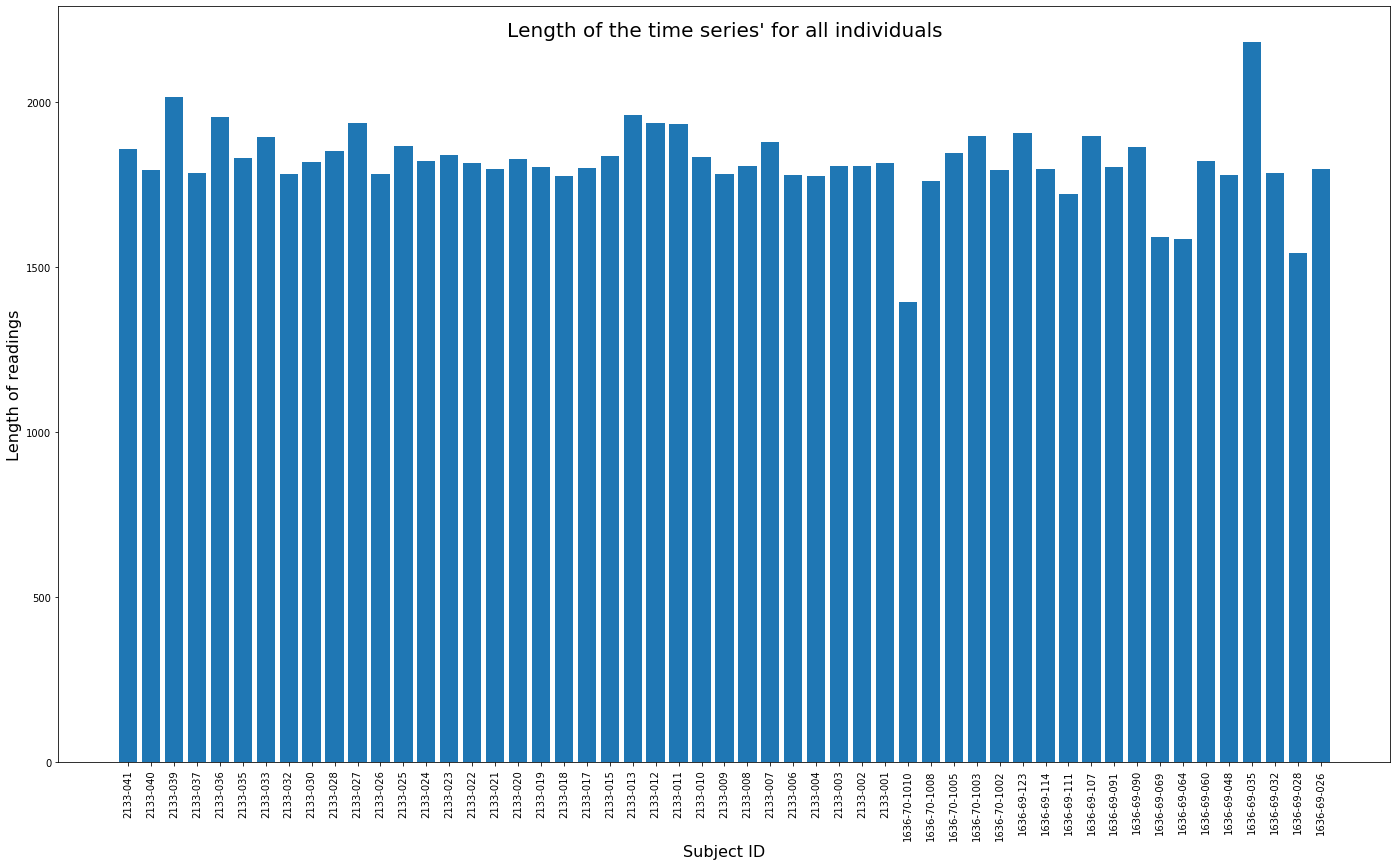

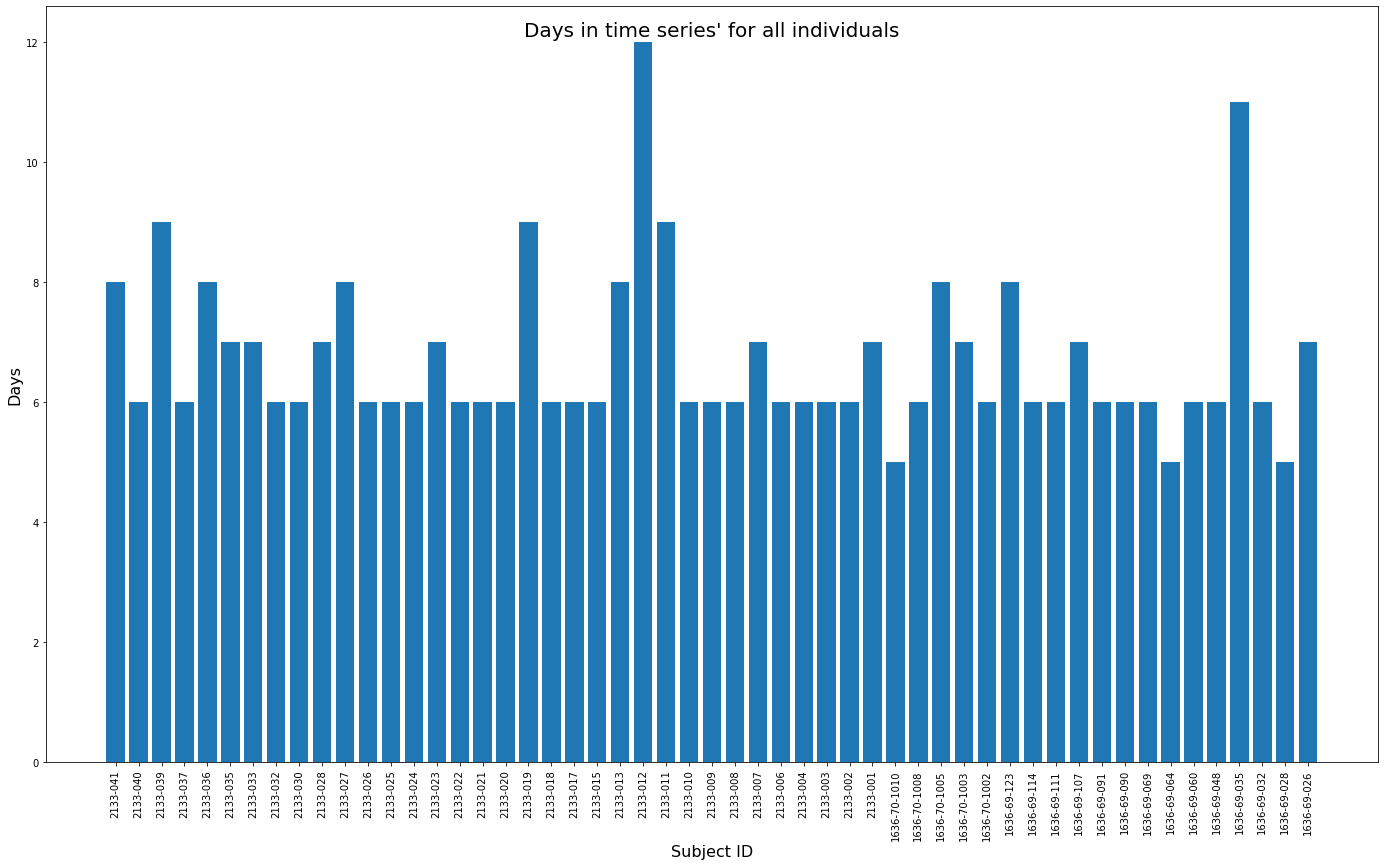

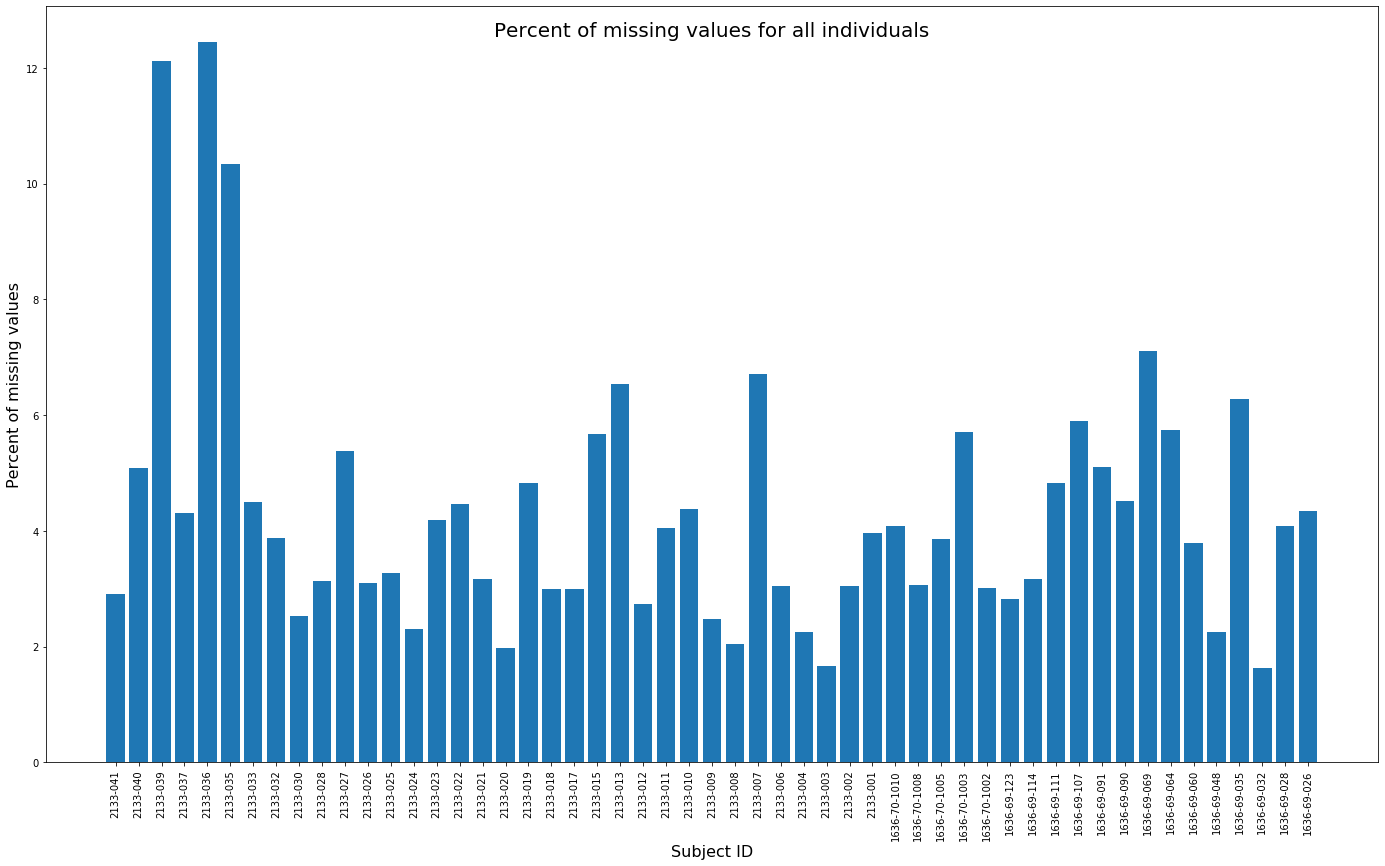

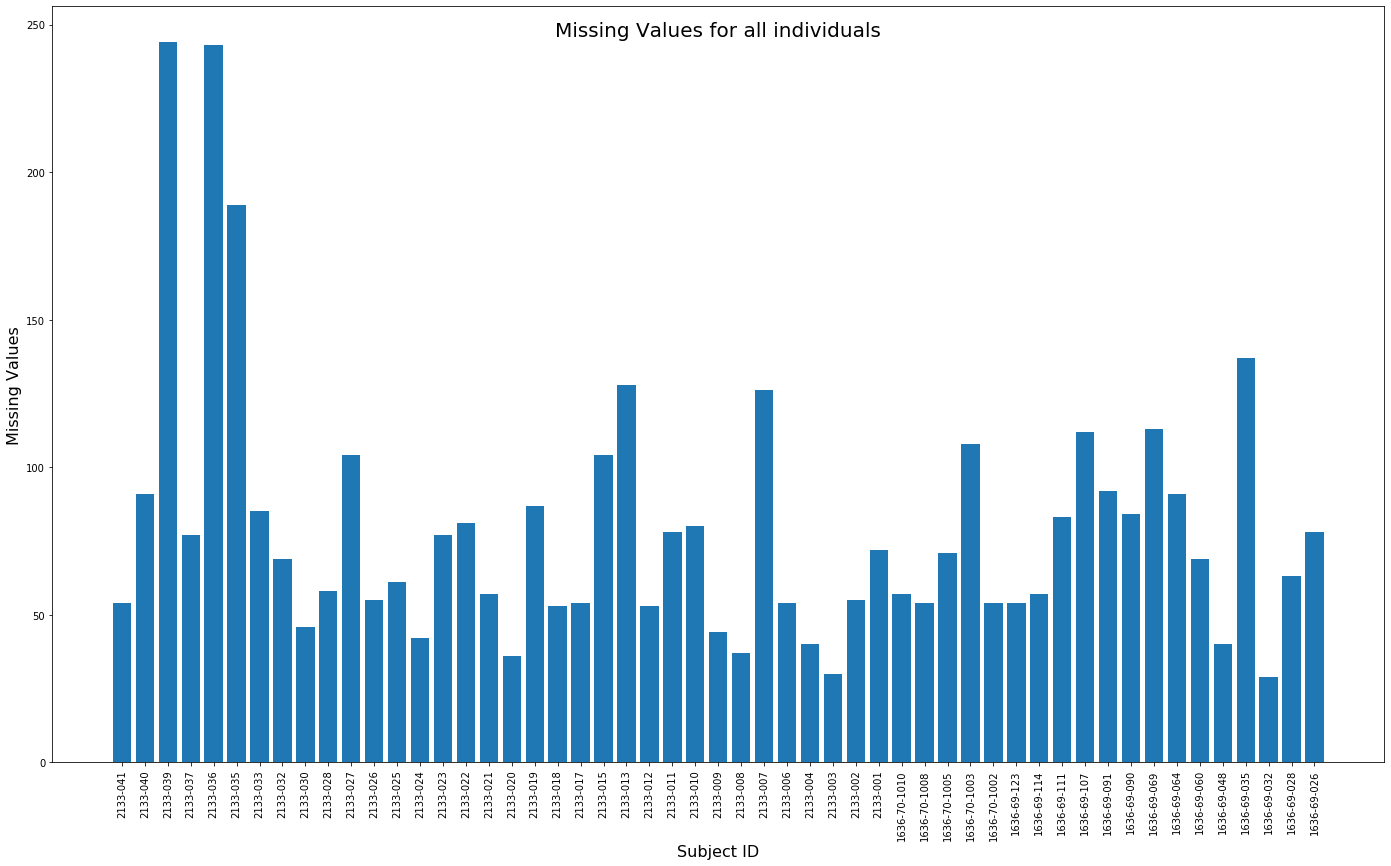

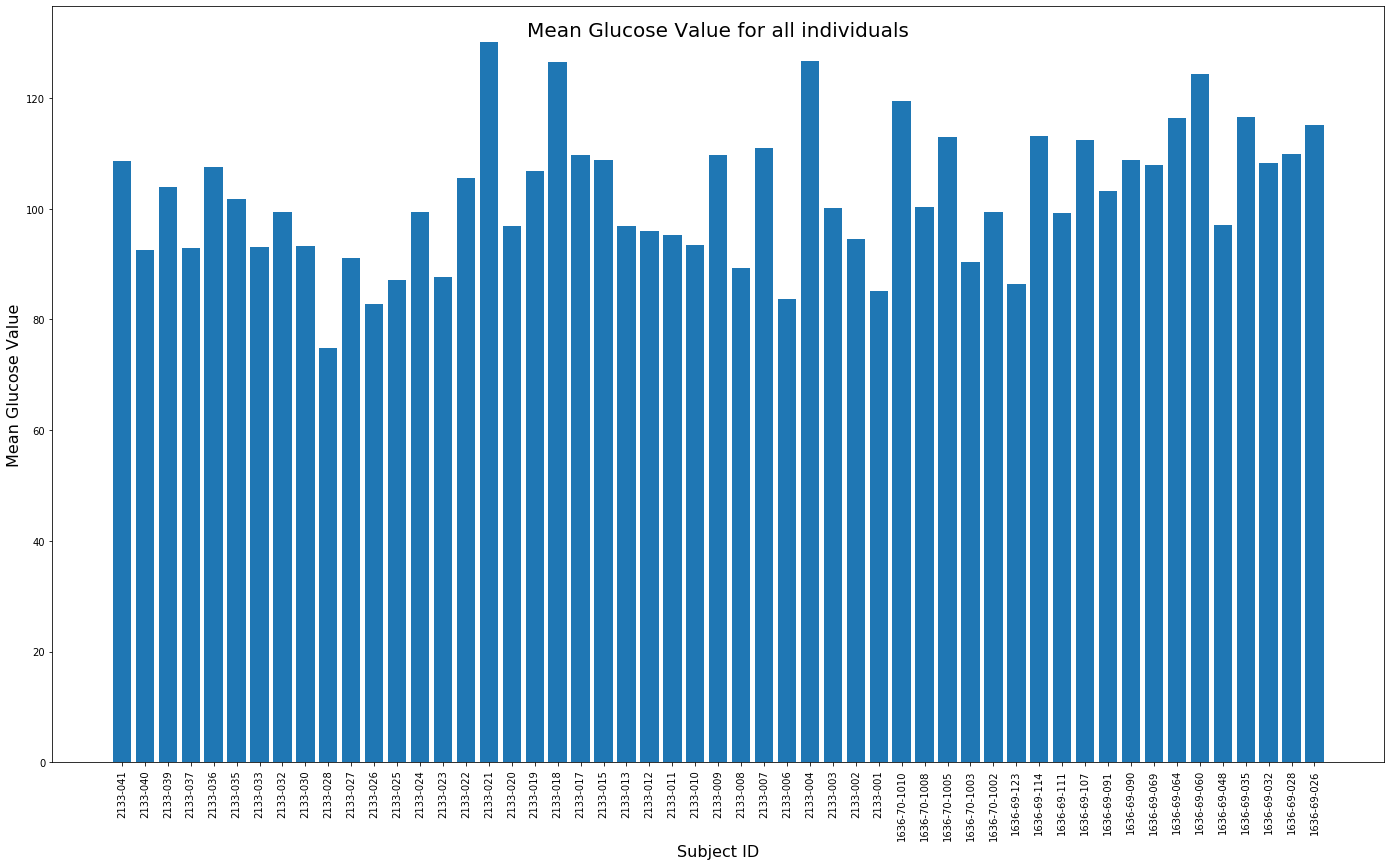

In [5]:
obj.dataDescribe()

In [6]:
diabetic_1, diabetic_2 , prediabetic, non_diabetic = testingData()#these time series' data will be used to plot comparison graphs
diabetic_1_faulty, diabetic_2_faulty, prediabetic_faulty, non_diabetic_faulty = testingData()#gaps will be introduced in these time series' for imputations 

501/501 [==============================] - 0s 801us/step
LSTM: 0.003760


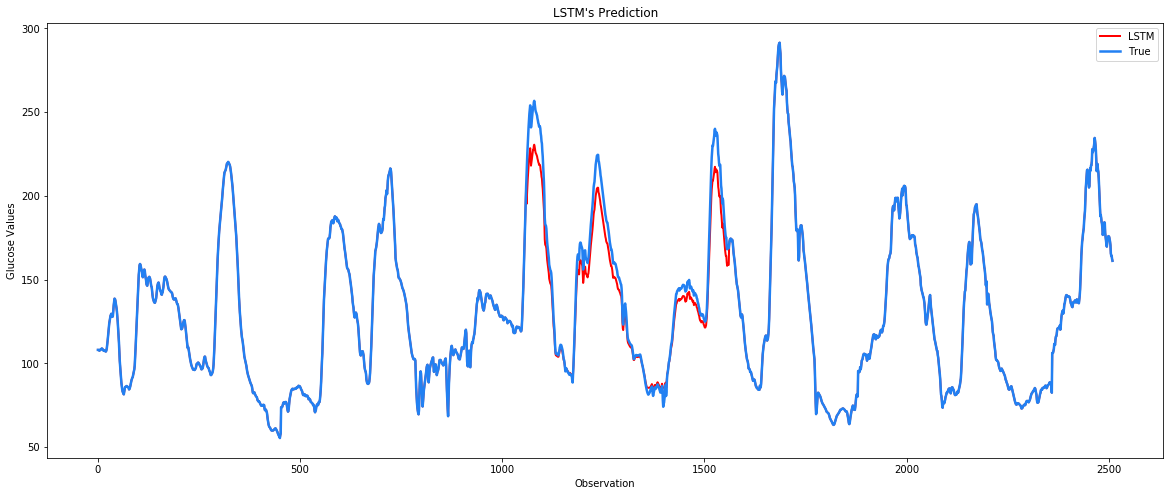

Index of Agreement is: 0.985
Mean Absolute Error is: 8.466187103454223
Root Mean Squared Error is: 11.196
Mean Absolute Difference is: [49.342903]
Fractional Bias is: 0.05
Mean Absolute Percentage Error is: 5.0


In [7]:
start, end = obj.createGap(diabetic_1)
gap_tester_diabetic_1 = diabetic_1.iloc[start:end+2]
diabetic_1_faulty = obj.faultyData(diabetic_1_faulty,start,end+1)

#here, we're actually running the model and getting the imputed values for the gap
predicted, true = obj.testModel(gap_tester_diabetic_1)
#here we are are filling in the gap we created with imputed values generated by the model
for i in range(0,501):
     diabetic_1_faulty['glucoseValue'][start+i] = predicted[i][0]

obj.plot(diabetic_1_faulty['glucoseValue'].tolist(),diabetic_1['glucoseValue'].tolist())
obj.getMetrics(predicted,true)
diabetic_1_faulty.to_csv("~/Desktop/NCSA_genomics/Data/outputs/CGM_diabetic-1_imputed.csv")

501/501 [==============================] - 0s 664us/step
LSTM: 0.003193


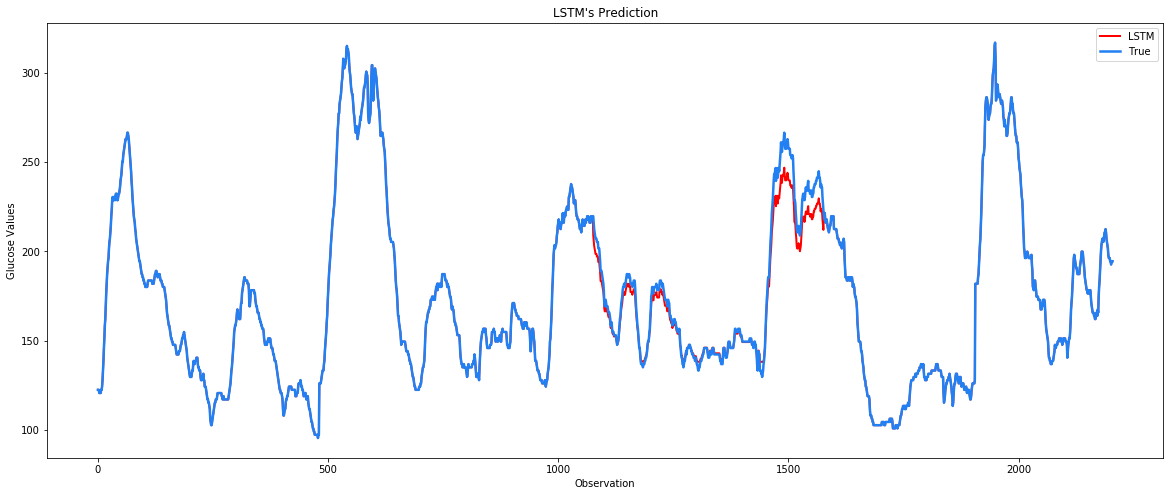

Index of Agreement is: 0.988
Mean Absolute Error is: 5.318929030367001
Root Mean Squared Error is: 7.73
Mean Absolute Difference is: [25.305979]
Fractional Bias is: 0.027
Mean Absolute Percentage Error is: 3.0


In [8]:
#repeating the same for diabetic type 2
start, end = obj.createGap(diabetic_2)
gap_tester_diabetic_2 = diabetic_2.iloc[start:end+2]
diabetic_2_faulty = obj.faultyData(diabetic_2_faulty,start,end+1)

predicted, true = obj.testModel(gap_tester_diabetic_2)

for i in range(0,501):
    diabetic_2_faulty['glucoseValue'][start+i] = predicted[i][0]
    
obj.plot(diabetic_2_faulty['glucoseValue'].tolist(),diabetic_2['glucoseValue'].tolist())
obj.getMetrics(predicted,true)
diabetic_2_faulty.to_csv("~/Desktop/NCSA_genomics/Data/outputs/CGM_diabetic-2_imputed.csv")

501/501 [==============================] - 0s 771us/step
LSTM: 0.002677


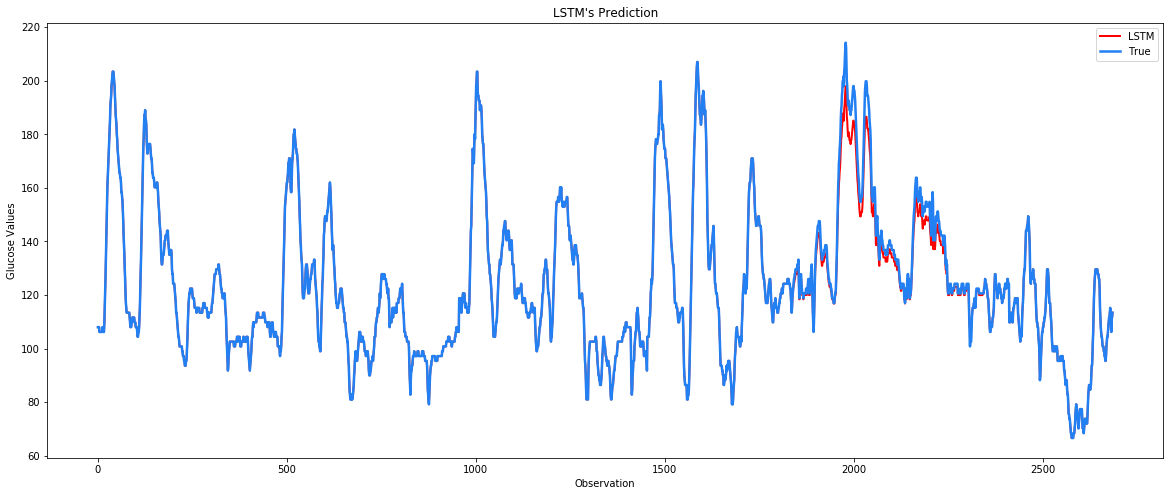

Index of Agreement is: 0.983
Mean Absolute Error is: 4.303550369963198
Root Mean Squared Error is: 5.867
Mean Absolute Difference is: [18.47661]
Fractional Bias is: 0.028
Mean Absolute Percentage Error is: 3.0


In [9]:
#repeating the same for prediabetic
start, end = obj.createGap(prediabetic)
gap_tester_prediabetic = prediabetic.iloc[start:end+2]
prediabetic_faulty = obj.faultyData(prediabetic_faulty,start,end+1)

predicted, true = obj.testModel(gap_tester_prediabetic)

for i in range(0,501):
    prediabetic_faulty['glucoseValue'][start+i] = predicted[i][0]
    
obj.plot(prediabetic_faulty['glucoseValue'].tolist(),prediabetic['glucoseValue'].tolist())
obj.getMetrics(predicted,true)
prediabetic_faulty.to_csv("~/Desktop/NCSA_genomics/Data/outputs/CGM_prediabetic_imputed.csv")

501/501 [==============================] - 0s 752us/step
LSTM: 0.002457


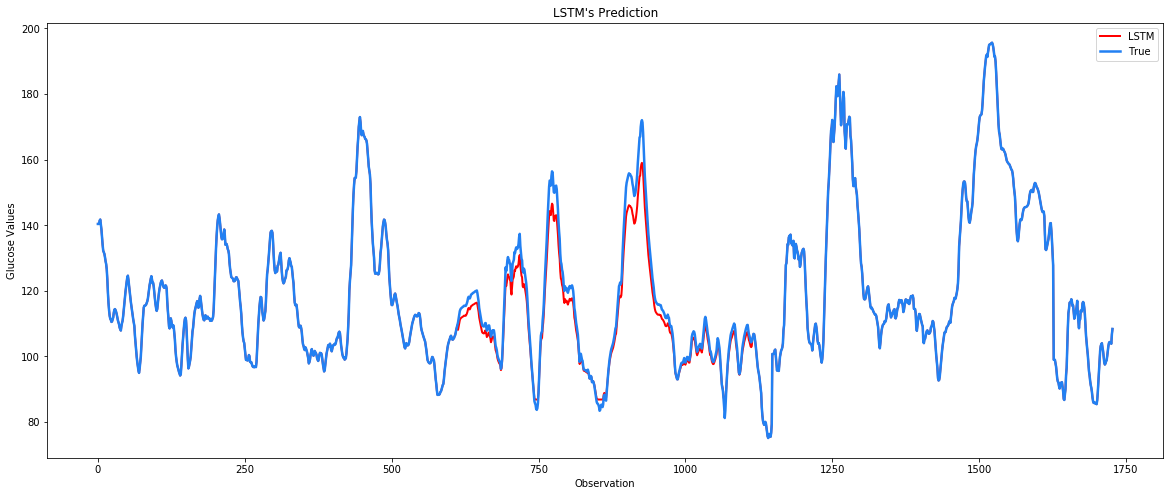

Index of Agreement is: 0.984
Mean Absolute Error is: 3.3589168350311094
Root Mean Squared Error is: 4.499
Mean Absolute Difference is: [13.584739]
Fractional Bias is: 0.028
Mean Absolute Percentage Error is: 3.0


In [10]:
#repeating the same for non-diabetic
start, end = obj.createGap(non_diabetic)
gap_tester_non_diabetic = non_diabetic.iloc[start:end+2]
non_diabetic_faulty = obj.faultyData(non_diabetic_faulty,start,end+1)

predicted, true = obj.testModel(gap_tester_non_diabetic)

for i in range(0,501):
    non_diabetic_faulty['glucoseValue'][start+i] = predicted[i][0]
    
obj.plot(non_diabetic_faulty['glucoseValue'].tolist(),non_diabetic['glucoseValue'].tolist())
obj.getMetrics(predicted,true)
non_diabetic_faulty.to_csv("~/Desktop/NCSA_genomics/Data/outputs/CGM_nondiabetic_imputed.csv")

In [11]:
writeToFile(diabetic_1_faulty,diabetic_2_faulty,prediabetic_faulty,non_diabetic_faulty)

In [12]:
gap_tester_non_diabetic

,glucoseValue
timeStamp,
2016-12-21 05:21:00,110.412
2016-12-21 05:24:00,111.528
2016-12-21 05:27:00,112.824
2016-12-21 05:30:00,113.832
2016-12-21 05:33:00,114.336
...,...
2016-12-22 06:12:00,105.390
2016-12-22 06:15:00,104.562
2016-12-22 06:18:00,104.310
